In [161]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re    # regular expression

In [162]:
from sklearn.feature_extraction.text import CountVectorizer # text classification into array
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle # read a img
import joblib
import warnings
warnings.filterwarnings('ignore')
print("imported")

imported


In [163]:
x,y=[],[]
with open (r"C:\Users\asus\CRT(ML)\E-mail spam detection\data\SMSSpamCollection.txt",'r')as file:
    data=file.read()
    for data_item in data.split("\n"):
        if len(data_item.split("\t"))==2:
            x.append(data_item.split("\t")[1])
            y.append(data_item.split("\t")[0])
print("successfully read the data from text file and split it into x and y")

successfully read the data from text file and split it into x and y


In [164]:
len(x),len(y)

(5574, 5574)

## Convert dataset into dataframe

In [165]:
data_dict={"email_message":x,"label":y}
df=pd.DataFrame(data_dict)

In [166]:
df.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email_message  5574 non-null   object
 1   label          5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Convert uppercase into lowercase


In [168]:
for i in range(0,len(df)):
    message=re.sub('[^a-zA-Z]',' ',df["email_message"][i]) # remove numbers from dataset
    message=message.lower()
    df['email_message'][i]=message
df.head()


,email_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


In [169]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

## Check wheather dataset is balance or not

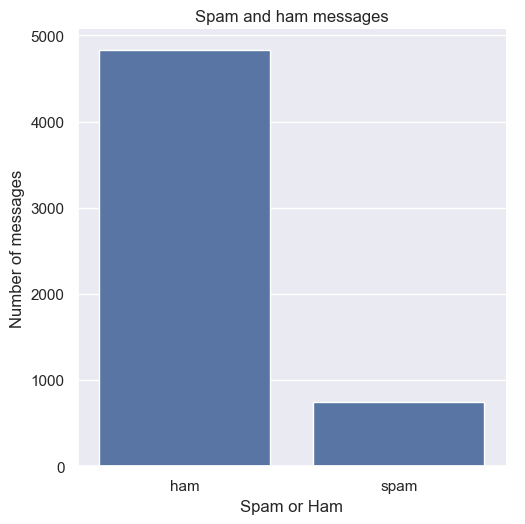

In [170]:
classes=list(df['label'].value_counts().index)
value=list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title("Spam and ham messages")
plt.xlabel("Spam or Ham")
plt.ylabel("Number of messages")    
plt.show()

## Balance the dataset

In [171]:
df.sample(2000)

,email_message,label
7,as per your request melle melle oru minnamin...,ham
5368,a xmas reward is waiting for you our co...,spam
587,i dun thk i ll quit yet hmmm can go jazz ...,ham
2580,i dunno until when lets go learn pilates,ham
144,i know you are can you pls open the back,ham
...,...,...
999,then wait me at bus stop aft ur lect lar ...,ham
4653,where r e meeting tmr,ham
3028,you still at the game,ham
4161,i felt so not any conveying reason ese he ...,ham


In [172]:
ham=df[df['label']=='ham'].sample(1000)
spam=df[df['label']=='spam']
balanced_df=pd.concat([ham,spam])

In [173]:
balanced_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

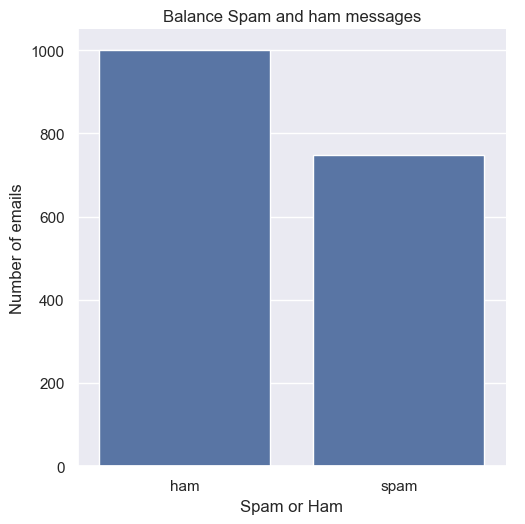

In [174]:
classes=list(balanced_df['label'].value_counts().index)
value=list(balanced_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title("Balance Spam and ham messages")
plt.xlabel("Spam or Ham")
plt.ylabel("Number of emails")    
plt.show()

In [175]:
balanced_df['label']=balanced_df['label'].map({'ham':0,'spam':1})


In [176]:
balanced_df.isnull().sum()

email_message    0
label            0
dtype: int64

In [177]:
print("Duplicate data :-",balanced_df.duplicated().sum())

Duplicate data :- 134


In [178]:
print("Shape:-",balanced_df.shape)

Shape:- (1747, 2)


In [179]:
balanced_df.drop_duplicates(inplace=True)

In [180]:
print("Duplicate data :-",balanced_df.duplicated().sum())

Duplicate data :- 0


In [181]:
print("Shape:-",balanced_df.shape)

Shape:- (1613, 2)


In [182]:
x=balanced_df['email_message']
y=balanced_df['label']

In [183]:
x[0:5]

3356                        minimum walk is  miles a day 
2655                          its sarcasm    nt scarcasim
2723    it s justbeen overa week since we broke up and...
1545    after completed degree  there is no use in joi...
3258    no  but you told me you were going  before you...
Name: email_message, dtype: object

## Covert text into numerical

In [184]:
bow_obj=CountVectorizer(max_features=2000,stop_words='english')

In [185]:
x_transformed=bow_obj.fit_transform(x)

In [186]:
dense_matrix=x_transformed.toarray()

In [187]:
dense_matrix.shape

(1613, 2000)

In [188]:
x=dense_matrix
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1613, 2000))

In [189]:
x[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 2000))

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape   

((1290, 2000), (323, 2000), (1290,), (323,))

In [191]:
obj_mnb=MultinomialNB()
obj_mnb.fit(x_train,y_train)
   

MultinomialNB()

In [192]:
obj_mnb.score(x_test,y_test)

0.9597523219814241

In [193]:
pred=obj_mnb.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [194]:
confusion_matrix(y_test,pred)   

array([[194,   6],
       [  7, 116]])

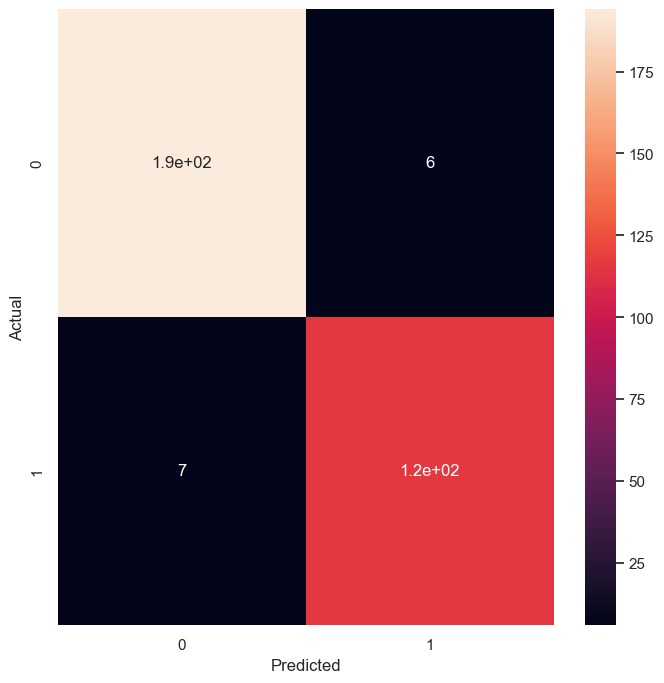

In [195]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [196]:
print(classification_report(y_test,pred))   

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.95      0.94      0.95       123

    accuracy                           0.96       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.96      0.96      0.96       323



In [197]:
pickle.dump(obj_mnb,open('spam.pkl','wb'))

In [198]:
compare={'actual':y_test,'predicted':pred}
compare=pd.DataFrame(compare)
compare.head()  

,actual,predicted
4220,0,0
3973,0,0
3044,0,0
4138,0,0
4272,1,1
